In [2]:
# Date: 28/05/2021
# Title: Titanic Project.
# Author: Parmeshwar Prajapati.

---
### 1. Importing modules.

In [32]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

import scipy.stats as scistats

---
### 2. Importing data.

In [33]:
raw_train = pd.read_csv('train.csv')
raw_test = pd.read_csv('test.csv')

print(raw_train.shape)
print(raw_test.shape)

(891, 12)
(418, 11)


#### 2.1. Quick glance at the data.

In [34]:
raw_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [35]:
# Dropping 'PassengerId' and 'Name'.

raw_train.drop(columns = ['PassengerId', 'Name'], inplace = True)
raw_test.drop(columns = ['PassengerId', 'Name'], inplace = True)

print('Raw train data shape:', raw_train.shape)
print('Raw test data shape:', raw_test.shape)

Raw train data shape: (891, 10)
Raw test data shape: (418, 9)


In [36]:
# Checking for null values in target data.

print('Null values in target feature:', 
      raw_train['Survived'].isnull().sum().sum())

Null values in target feature: 0


#### 2.2. Describing the data.

In [37]:
raw_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
raw_train.describe(include = 'object')

,Sex,Ticket,Cabin,Embarked
count,891,891,204,889
unique,2,681,147,3
top,male,1601,B96 B98,S
freq,577,7,4,644


#### 2.3. Checking the data types.

In [39]:
raw_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [40]:
# Comparing the dtypes.

print('Data types are same in training and testing dataset:', 
      all((raw_train.dtypes[1:] == raw_test.dtypes).values))


Data types are same in training and testing dataset: True


---
### 3. EDA

#### 3.1. Checking for null values.

In [41]:
train_null_data = (raw_train.isnull().sum()/raw_train.shape[0])*100
train_null_col25 = train_null_data[train_null_data > 25].keys().to_list()

test_null_data = (raw_test.isnull().sum()/raw_test.shape[0])*100
test_null_col25 = test_null_data[test_null_data > 25].keys().to_list()

print('Null columns in train data with more than 25% null values are:', 
      train_null_col25)
print('Null columns in test data with more than 25% null values are:', 
      test_null_col25)

Null columns in train data with more than 25% null values are: ['Cabin']
Null columns in test data with more than 25% null values are: ['Cabin']


In [42]:
# Checking whether the above column can be dropped or not.

# 1) 891 tickets are present so everyone should have a Cabin.
# 2) If the null values are filled with 'mode' or 'median' values then more 
# people will have same Cabin which cannot be True.

# Dropping 'Cabin' column from both the dataset.
raw_train.drop(columns = 'Cabin', inplace = True)
raw_test.drop(columns = 'Cabin', inplace = True)

#### 3.2. Checking columns with low variance.

In [43]:
# Columns with low variance.

raw_train.var()

Survived       0.236772
Pclass         0.699015
Age          211.019125
SibSp          1.216043
Parch          0.649728
Fare        2469.436846
dtype: float64

In [44]:
# The above columns have low variance due to low value range.

#### 3.3. Splitting the data.

In [45]:
# Splitting data.
# Data is too small using stratified shuffle split

from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, 
                                  random_state = 0)

for train_index, valid_index in splitter.split(raw_train, raw_train['Survived']):
    train_data = raw_train.iloc[train_index]
    valid_data = raw_train.iloc[valid_index]
    
train_data.reset_index(drop = True, inplace = True)
valid_data.reset_index(drop = True, inplace = True)

In [46]:
# Checking the shapes.

print('Shape of training data:', train_data.shape)
print('Shape of testing data:', valid_data.shape)

Shape of training data: (712, 9)
Shape of testing data: (179, 9)


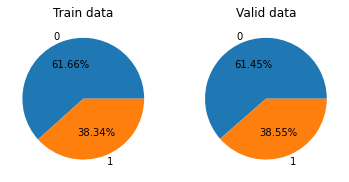

In [47]:
# Checking the proportions.

pie_train = train_data['Survived'].value_counts()/train_data.shape[0]*100
pie_valid = valid_data['Survived'].value_counts()/valid_data.shape[0]*100

plt.Figure(figsize = (8, 8))
plt.subplot(121)
plt.title('Train data')
plt.pie(x = pie_train.to_list(), labels = pie_train.index.to_list(), 
        autopct = '%1.2f%%')

plt.subplot(122)
plt.title('Valid data')
plt.pie(x = pie_valid.to_list(), labels = pie_valid.index.to_list(), 
        autopct = '%1.2f%%')
plt.show()

#### 3.4. Checking for valid zeros.

In [48]:
(train_data == 0).sum()

Survived    439
Pclass        0
Sex           0
Age           0
SibSp       486
Parch       546
Ticket        0
Fare         12
Embarked      0
dtype: int64

In [49]:
# Survived, SibSp and Parch columns can have zero values.
# Checking for Fare.

train_data[train_data['Fare'] == 0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
28,0,3,male,49.0,0,0,LINE,0.0,S
45,0,2,male,NaN,0,0,239856,0.0,S
62,0,1,male,NaN,0,0,112058,0.0,S
208,0,1,male,40.0,0,0,112059,0.0,S
218,0,1,male,38.0,0,0,19972,0.0,S
258,0,3,male,36.0,0,0,LINE,0.0,S
314,0,2,male,NaN,0,0,239855,0.0,S
349,0,1,male,39.0,0,0,112050,0.0,S
386,0,2,male,NaN,0,0,239853,0.0,S
420,0,2,male,NaN,0,0,239853,0.0,S


In [50]:
# Checking for minimum age.

train_data[train_data['Fare'] == 0]['Age'].min()

25.0

In [51]:
valid_data[valid_data['Fare'] == 0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,0,1,male,NaN,0,0,112052,0.0,S
111,0,2,male,NaN,0,0,239853,0.0,S
172,0,3,male,19.0,0,0,LINE,0.0,S


In [52]:
# Checking for minimum age.

valid_data[valid_data['Fare'] == 0]['Age'].min()

19.0

In [53]:
raw_test[raw_test['Fare'] == 0]

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
266,1,male,NaN,0,0,112051,0.0,S
372,1,male,49.0,0,0,112058,0.0,S


In [54]:
# Checking for minimum age.

raw_test[raw_test['Fare'] == 0]['Age'].min()

49.0

In [55]:
# As we all know people with Age above 25 should pay for their ticket.
# So, we need to replace those zeros.

#### 3.5. Checking for null columns.

In [56]:
# Finding null columns.

train_null_data = train_data.isnull().sum()
train_null_cols = train_null_data[train_null_data > 0].keys().to_list()

valid_null_data = valid_data.isnull().sum()
valid_null_cols = valid_null_data[valid_null_data > 0].keys().to_list()

test_null_data = raw_test.isnull().sum()
test_null_cols = test_null_data[test_null_data > 0].keys().to_list()

print('Null columns in Training data are:', train_null_cols)
print('Null columns in Validation data are:', valid_null_cols)
print('Null columns in Test data are:', test_null_cols)

Null columns in Training data are: ['Age', 'Embarked']
Null columns in Validation data are: ['Age']
Null columns in Test data are: ['Age', 'Fare']


#### 3.6. Imputing the data.

In [57]:
from sklearn.impute import SimpleImputer

In [58]:
imp = SimpleImputer(strategy = 'most_frequent')

train_data_ = train_data.drop(columns = 'Survived')
valid_data_ = valid_data.drop(columns = 'Survived')

temp_train_data = imp.fit_transform(train_data_)
temp_valid_data = imp.transform(valid_data_)
temp_test_data = imp.transform(raw_test)

imp_train_data = pd.DataFrame(temp_train_data, 
                              columns = train_data_.columns.to_list())
imp_valid_data = pd.DataFrame(temp_valid_data, 
                              columns = valid_data_.columns.to_list())
imp_test_data = pd.DataFrame(temp_test_data, 
                             columns = raw_test.columns.to_list())

imp_train_data = pd.concat([imp_train_data, train_data['Survived']], 
                           axis = 1)
imp_valid_data = pd.concat([imp_valid_data, valid_data['Survived']], 
                           axis = 1)

print('Shape of trainig data:', imp_train_data.shape)
print('Shape of valid data:',imp_valid_data.shape)
print('Shape of testing data:',imp_test_data.shape)

Shape of trainig data: (712, 9)
Shape of valid data: (179, 9)
Shape of testing data: (418, 8)


In [59]:
# Cross checking for null values.

print('Null values in trainig data:',imp_train_data.isnull().sum().sum())
print('Null values in valid data:',imp_valid_data.isnull().sum().sum())
print('Null values in testing data:',imp_test_data.isnull().sum().sum())

Null values in trainig data: 0
Null values in valid data: 0
Null values in testing data: 0


#### 3.7. Correcting the data type.

In [60]:
cols = imp_train_data.columns.to_list()
cols.remove('Survived')

for col in cols:
    imp_train_data[col] = imp_train_data[col].astype(type(imp_train_data[col][0]))
    imp_valid_data[col] = imp_valid_data[col].astype(type(imp_valid_data[col][0]))
    imp_test_data[col] = imp_test_data[col].astype(type(imp_test_data[col][0]))

In [61]:
# Cross checking

imp_train_data.dtypes

Pclass        int32
Sex          object
Age         float64
SibSp         int32
Parch         int32
Ticket       object
Fare        float64
Embarked     object
Survived      int64
dtype: object

#### 3.8. Filling the zero values.

In [62]:
zero_fare = imp_train_data[['Fare', 'Age']].groupby('Age').mean().to_dict()['Fare']
fare_index = imp_train_data.columns.get_indexer(['Fare'])

for index in imp_train_data[imp_train_data['Fare'] == 0].index:
    val = zero_fare[imp_train_data.iloc[index, :]['Age']]
    imp_train_data.iloc[index, fare_index] = val

In [63]:
# Cross checking

any(imp_train_data['Fare'] == 0)

False

In [64]:
zero_fare = imp_valid_data[['Fare', 'Age']].groupby('Age').mean().to_dict()['Fare']
fare_index = imp_valid_data.columns.get_indexer(['Fare'])

for index in imp_valid_data[imp_valid_data['Fare'] == 0].index:
    val = zero_fare[imp_valid_data.iloc[index, :]['Age']]
    imp_valid_data.iloc[index, fare_index] = val
    
# Cross checking
any(imp_valid_data['Fare'] == 0)

False

In [65]:
zero_fare = imp_test_data[['Fare', 'Age']].groupby('Age').mean().to_dict()['Fare']
fare_index = imp_test_data.columns.get_indexer(['Fare'])

for index in imp_test_data[imp_test_data['Fare'] == 0].index:
    val = zero_fare[imp_test_data.iloc[index, :]['Age']]
    imp_test_data.iloc[index, fare_index] = val
    
# Cross checking
any(imp_test_data['Fare'] == 0)

False

### 4. Exploring data.

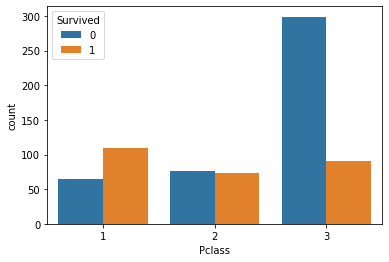

In [66]:
sb.countplot(x = imp_train_data['Pclass'], hue = imp_train_data['Survived'])
plt.show()

Individuals belonging to Pclass 3 have less chance of surviving.

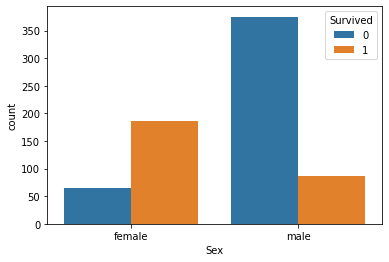

In [67]:
sb.countplot(x = imp_train_data['Sex'], hue = imp_train_data['Survived'])
plt.show()

Males have less chance of surviving.

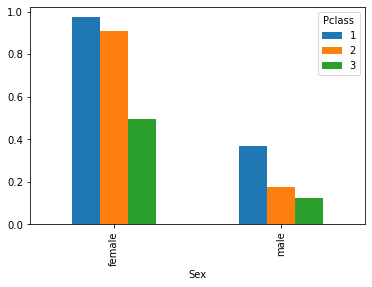

In [68]:
imp_train_data.pivot_table('Survived', index = 'Sex', columns = 'Pclass').plot(kind = 'bar')
plt.show()

Females of all the class have higher chance of survival than males.

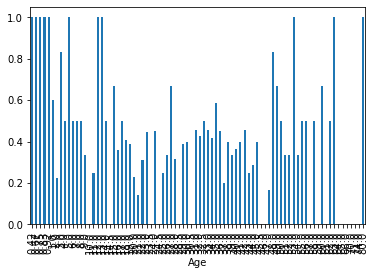

In [69]:
imp_train_data.groupby('Age')['Survived'].mean().plot(kind = 'bar')
plt.show()

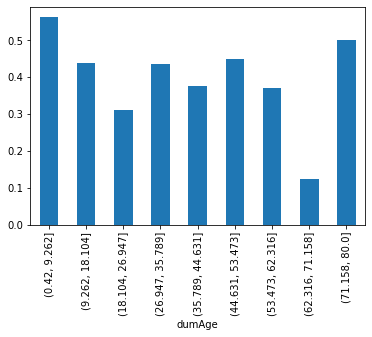

In [70]:
# For visualization.

imp_train_data['dumAge'] = pd.cut(imp_train_data['Age'], 
                                   bins = np.linspace(imp_train_data['Age'].min(),
                                                      imp_train_data['Age'].max(), 10))

imp_train_data.groupby('dumAge')['Survived'].mean().plot(kind = 'bar')
plt.show()

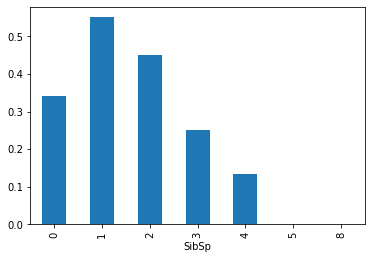

In [71]:
imp_train_data.groupby('SibSp')['Survived'].mean().plot(kind = 'bar')
plt.show()

Chance of survival is highest if number of SibSp is 1.

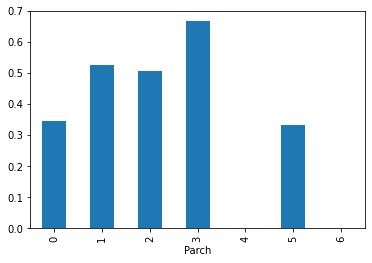

In [72]:
imp_train_data.groupby('Parch')['Survived'].mean().plot(kind = 'bar')
plt.show()

Chance of survival is highest if number of Parch is 3.

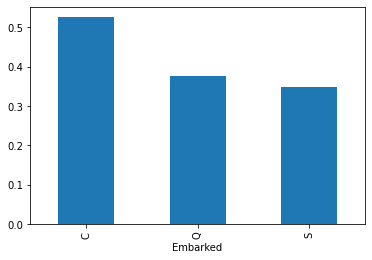

In [73]:
imp_train_data.groupby('Embarked')['Survived'].mean().plot(kind = 'bar')
plt.show()

Chance of survival is highest if Embarked from port 'C'.

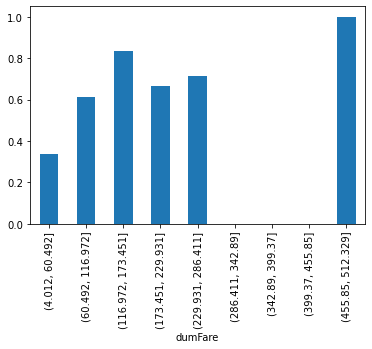

In [74]:
imp_train_data['dumFare'] = pd.cut(imp_train_data['Fare'], 
                                   bins = np.linspace(imp_train_data['Fare'].min(),
                                                      imp_train_data['Fare'].max(), 10))

imp_train_data.groupby('dumFare')['Survived'].mean().plot(kind = 'bar')
plt.show()

In [75]:
# Dropping unnecessary columns.

imp_train_data = imp_train_data.drop(columns = ['dumFare', 'dumAge'])

### 5. Assumptions for Logistic Regression.

In [76]:
# Assumptions: -
# 1) Independent features.
# 2) Normally distributed.
# 3) No outliers.

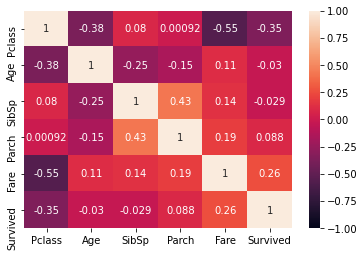

In [77]:
# 1) Independent features.

corr_matrix = imp_train_data.corr()
sb.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1)
plt.show()

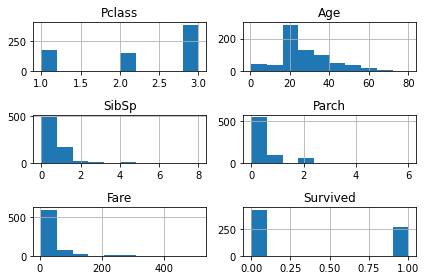

In [78]:
# 2) Normally distributed.

imp_train_data.hist()
plt.tight_layout()
plt.show()

In [79]:
# Data is not normally distributed.

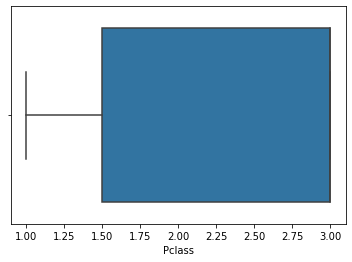

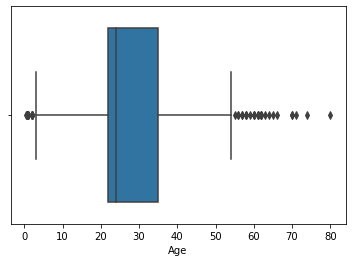

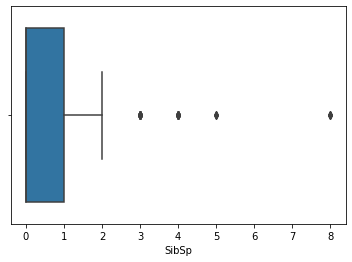

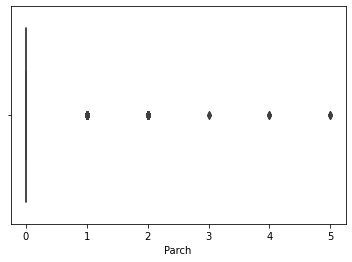

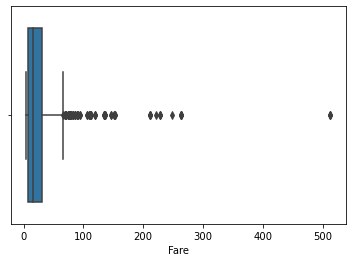

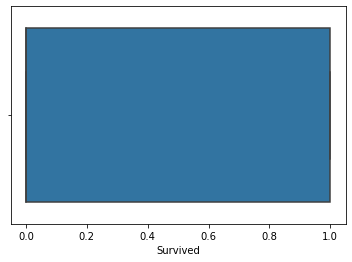

In [183]:
# 3) No outliers.

for col in imp_train_data.select_dtypes(exclude = 'object').columns:
    sb.boxplot(x = imp_train_data[col])
    plt.show()

In [80]:
# Removing outliers.

imp_train_data = imp_train_data[imp_train_data['Fare'] < 400]

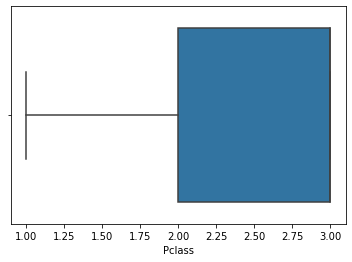

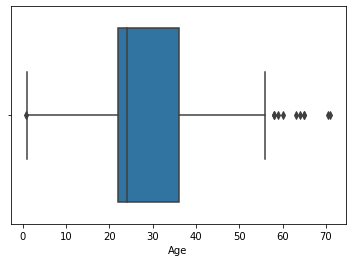

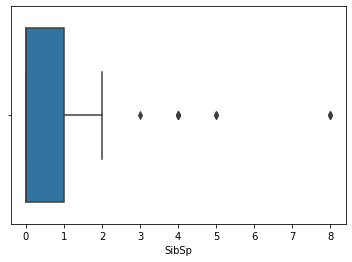

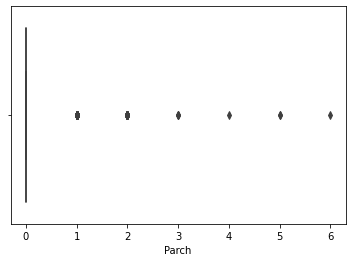

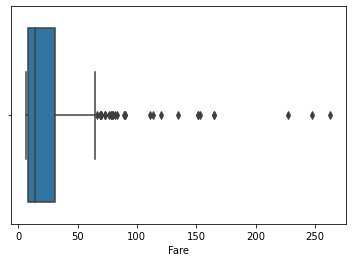

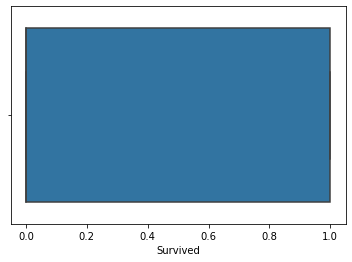

In [185]:
for col in imp_valid_data.select_dtypes(exclude = 'object').columns:
    sb.boxplot(x = imp_valid_data[col])
    plt.show()

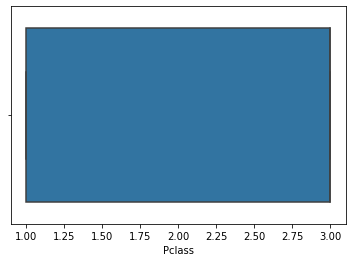

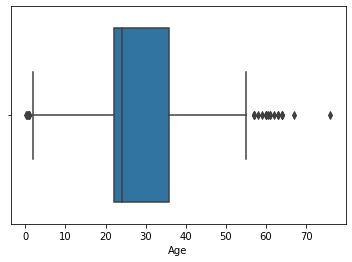

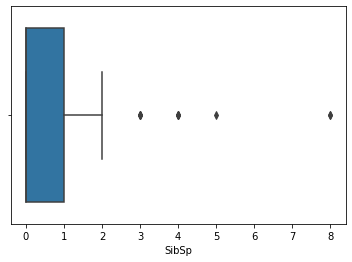

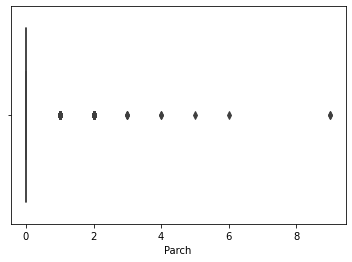

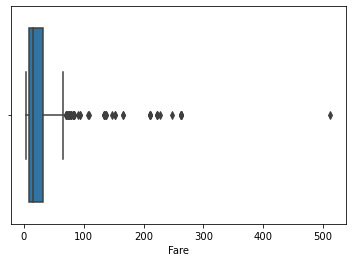

In [186]:
for col in imp_test_data.select_dtypes(exclude = 'object').columns:
    sb.boxplot(x = imp_test_data[col])
    plt.show()

In [81]:
# Splitting the features and target variables.

y_train = imp_train_data['Survived']
imp_train_data = imp_train_data.drop(columns = ['Survived'])

y_valid = imp_valid_data['Survived']
imp_valid_data = imp_valid_data.drop(columns = 'Survived')

### 6. Feature Engineering.

In [82]:
imp_train_data_ = imp_train_data.copy()
imp_valid_data_ = imp_valid_data.copy()
imp_test_data_ = imp_test_data.copy()

#### 6.1. Ordinal Encoding.

In [83]:
# Converting 'Pclass' to str

imp_train_data_.loc[:, 'Pclass'] = imp_train_data_.loc[:, 'Pclass'].astype(str)
imp_valid_data_.loc[:, 'Pclass'] = imp_valid_data_.loc[:, 'Pclass'].astype(str)
imp_test_data_.loc[:, 'Pclass'] = imp_test_data_.loc[:, 'Pclass'].astype(str)

In [84]:
# Mapping the values.

imp_train_data_['Pclass'] = imp_train_data_['Pclass'].map({'3': 1, '2': 2, '1': 3})
imp_valid_data_['Pclass'] = imp_valid_data_['Pclass'].map({'3': 1, '2': 2, '1': 3})
imp_test_data_['Pclass'] = imp_test_data_['Pclass'].map({'3': 1, '2': 2, '1': 3})

#### 6.2. Log transformation on skewed data.

In [85]:
# Checking for skewed data.

num_train_data = imp_train_data_.select_dtypes(exclude = 'object')
skewness = num_train_data.apply(lambda x: scistats.skew(x))
train_skewed_cols = skewness[abs(skewness) > 0.75].keys().to_list()
print('Skewed columns are:', train_skewed_cols)

num_valid_data = imp_valid_data_.select_dtypes(exclude = 'object')
skewness = num_valid_data.apply(lambda x: scistats.skew(x))
valid_skewed_cols = skewness[abs(skewness) > 0.75].keys().to_list()
print('Skewed columns are:', valid_skewed_cols)

num_test_data = imp_test_data_.select_dtypes(exclude = 'object')
skewness = num_test_data.apply(lambda x: scistats.skew(x))
test_skewed_cols = skewness[abs(skewness) > 0.75].keys().to_list()
print('Skewed columns are:', test_skewed_cols)

Skewed columns are: ['SibSp', 'Parch', 'Fare']
Skewed columns are: ['SibSp', 'Parch', 'Fare']
Skewed columns are: ['Age', 'SibSp', 'Parch', 'Fare']


In [86]:
# Applying log transformation.

log_train_data = np.log1p(imp_train_data_.loc[:, test_skewed_cols])
imp_train_data_.drop(columns = test_skewed_cols, inplace = True)
log_train_data.reset_index(drop = True, inplace = True)

log_valid_data = np.log1p(imp_valid_data_.loc[:, test_skewed_cols])
imp_valid_data_.drop(columns = test_skewed_cols, inplace = True)
log_valid_data.reset_index(drop = True, inplace = True)

log_test_data = np.log1p(imp_test_data_.loc[:, test_skewed_cols])
imp_test_data_.drop(columns = test_skewed_cols, inplace = True)
log_test_data.reset_index(drop = True, inplace = True)

In [87]:
# Cross checking for null values.

print('Null values in log_train_data:', log_train_data.isnull().sum().sum())
print('Null values in log_valid_data:', log_valid_data.isnull().sum().sum())
print('Null values in log_test_data:', log_test_data.isnull().sum().sum())

Null values in log_train_data: 0
Null values in log_valid_data: 0
Null values in log_test_data: 0


In [88]:
# Checking for shape.

print('Shape of log_train_data:', log_train_data.shape)
print('Shape of log_valid_data:', log_valid_data.shape)
print('Shape of log_test_data:', log_test_data.shape)

Shape of log_train_data: (709, 4)
Shape of log_valid_data: (179, 4)
Shape of log_test_data: (418, 4)


In [89]:
# Splitting numerical and categorical data.

num_train_data = imp_train_data_.select_dtypes(exclude = 'object')
obj_train_data = imp_train_data_.select_dtypes(include = 'object')

num_valid_data = imp_valid_data_.select_dtypes(exclude = 'object')
obj_valid_data = imp_valid_data_.select_dtypes(include = 'object')

num_test_data = imp_test_data_.select_dtypes(exclude = 'object')
obj_test_data = imp_test_data_.select_dtypes(include = 'object')

#### 6.3. Scaling and One hot encoding.

In [90]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [91]:
std = StandardScaler()
ohe = OneHotEncoder()

# One hot encoding.

train_split = num_train_data.shape[0]
valid_split = train_split + num_valid_data.shape[0]

temp_data = pd.concat([obj_train_data, 
                       obj_valid_data,
                       obj_test_data], axis = 0)

temp_data.reset_index(drop = True, inplace = True)

temp_data_arr = ohe.fit_transform(temp_data).toarray()
col_names = ohe.get_feature_names(temp_data.columns.to_list())

In [92]:
ohe_train_data = pd.DataFrame(temp_data_arr[0: train_split, :], 
                              columns = col_names)
ohe_train_data.reset_index(drop = True, inplace = True)

ohe_valid_data = pd.DataFrame(temp_data_arr[train_split: valid_split, :], 
                              columns = col_names)
ohe_valid_data.reset_index(drop = True, inplace = True)

ohe_test_data = pd.DataFrame(temp_data_arr[valid_split: , :], 
                              columns = col_names)
ohe_test_data.reset_index(drop = True, inplace = True)

In [93]:
# Checking for null values.

print('Null values in ohe_train_data:', ohe_train_data.isnull().sum().sum())
print('Null values in ohe_valid_data:', ohe_valid_data.isnull().sum().sum())
print('Null values in ohe_test_data:', ohe_test_data.isnull().sum().sum())

Null values in ohe_train_data: 0
Null values in ohe_valid_data: 0
Null values in ohe_test_data: 0


In [94]:
# Checking shapes.

print('Shape of ohe_train_data:', ohe_train_data.shape)
print('Shape of ohe_valid_data:', ohe_valid_data.shape)
print('Shape of ohe_test_data:', ohe_test_data.shape)

Shape of ohe_train_data: (709, 934)
Shape of ohe_valid_data: (179, 934)
Shape of ohe_test_data: (418, 934)


In [95]:
# Standard scaling.

num_train_data_arr = std.fit_transform(num_train_data)
num_valid_data_arr = std.transform(num_valid_data)
num_test_data_arr = std.transform(num_test_data)

std_train_data = pd.DataFrame(num_train_data_arr, 
                              columns = num_train_data.columns.to_list())
std_valid_data = pd.DataFrame(num_valid_data_arr, 
                              columns = num_valid_data.columns.to_list())
std_test_data = pd.DataFrame(num_test_data_arr, 
                              columns = num_test_data.columns.to_list())

std_train_data.reset_index(drop = True, inplace = True)
std_valid_data.reset_index(drop = True, inplace = True)
std_test_data.reset_index(drop = True, inplace = True)

#### 6.4. Final data.

In [96]:
mod_train_data = pd.concat([std_train_data, log_train_data, ohe_train_data], 
                           axis = 1)
mod_valid_data = pd.concat([std_valid_data, log_valid_data, ohe_valid_data], 
                           axis = 1)
mod_test_data = pd.concat([std_test_data, log_test_data, ohe_test_data], 
                           axis = 1)

In [98]:
# Checking for null values.

print('Null values in mod_train_data:', mod_train_data.isnull().sum().sum())
print('Null values in mod_valid_data:', mod_valid_data.isnull().sum().sum())
print('Null values in mod_test_data:', mod_test_data.isnull().sum().sum())

Null values in mod_train_data: 0
Null values in mod_valid_data: 0
Null values in mod_test_data: 0


In [99]:
# Checking for shape.

print('Shape of mod_train_data', mod_train_data.shape)
print('Shape of mod_valid_data', mod_valid_data.shape)
print('Shape of mod_test_data', mod_test_data.shape)

print(y_train.shape)
print(y_valid.shape)

Shape of mod_train_data (709, 939)
Shape of mod_valid_data (179, 939)
Shape of mod_test_data (418, 939)
(709,)
(179,)


### 7. Developing Models.

In [70]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [71]:
lrclf = LogisticRegression()
sgdclf = SGDClassifier()

dtclf = DecisionTreeClassifier(random_state = 0)

rfclf = RandomForestClassifier(random_state = 0)
gbclf = GradientBoostingClassifier(random_state = 0)

In [72]:
classifiers = [lrclf, sgdclf, dtclf, rfclf, gbclf]

for classifier in classifiers:
    clf_scores = cross_val_score(classifier, X = mod_train_data, y = y_train, 
                                 cv = 10)
    print(f'Score of {classifier} model:', np.round(clf_scores.mean(), 4))

Score of LogisticRegression() model: 0.8237
Score of SGDClassifier() model: 0.8238
Score of DecisionTreeClassifier(random_state=0) model: 0.811
Score of RandomForestClassifier(random_state=0) model: 0.8336
Score of GradientBoostingClassifier(random_state=0) model: 0.8237


#### 7.1. Decision tree.

In [73]:
dtres = dtclf.fit(mod_train_data, y_train)

feature_names = mod_train_data.columns.to_list()
len_features = len(feature_names)

dt_imp_features = pd.DataFrame(data = dtres.feature_importances_, 
                               index = feature_names,
                               columns = ['Importance'])

top = 10
top_dt_features = dt_imp_features.sort_values('Importance', 
                                              ascending = False)[0: top]

#### 7.2. Random forest.

In [74]:
rfres = rfclf.fit(mod_train_data, y_train)

rf_imp_features = pd.DataFrame(data = rfres.feature_importances_, 
                               index = feature_names,
                               columns = ['Importance'])

top_rf_features = rf_imp_features.sort_values('Importance', 
                                              ascending = False)[0: top]

#### 7.3. Important features.

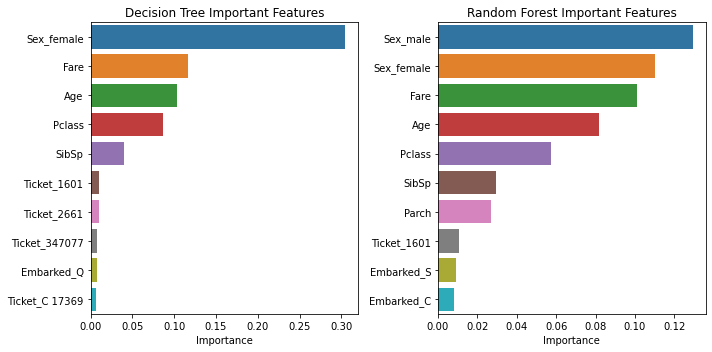

In [75]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
sb.barplot(x = 'Importance', y = top_dt_features.index,
           data = top_dt_features)
plt.title('Decision Tree Important Features')

plt.subplot(122)
sb.barplot(x = 'Importance', y = top_rf_features.index,
           data = top_rf_features)
plt.title('Random Forest Important Features')
plt.tight_layout()
plt.show()

#### 7.4. Model with Ticket feature removed.

In [76]:
wo_ticket_cols = [mod_train_data.columns.to_list()[i] for i, j in enumerate(mod_train_data.columns.str.startswith('Ticket')) if j == 0]
wo_ticket_train_data =  mod_train_data[wo_ticket_cols]

wo_ticket_cols = [mod_valid_data.columns.to_list()[i] for i, j in enumerate(mod_valid_data.columns.str.startswith('Ticket')) if j == 0]
wo_ticket_valid_data =  mod_valid_data[wo_ticket_cols]

wo_ticket_cols = [mod_test_data.columns.to_list()[i] for i, j in enumerate(mod_test_data.columns.str.startswith('Ticket')) if j == 0]
wo_ticket_test_data =  mod_test_data[wo_ticket_cols]

In [78]:
# Without ticket data.

classifiers = [lrclf, sgdclf, dtclf, rfclf, gbclf]

for classifier in classifiers:
    clf_scores = cross_val_score(classifier, X = wo_ticket_train_data, 
                                 y = y_train, cv = 10)
    print(f'Score of {classifier} model:', np.round(clf_scores.mean(), 4))

Score of LogisticRegression() model: 0.804
Score of SGDClassifier() model: 0.7491
Score of DecisionTreeClassifier(random_state=0) model: 0.7728
Score of RandomForestClassifier(random_state=0) model: 0.8209
Score of GradientBoostingClassifier(random_state=0) model: 0.8336


#### 7.5. Hyperparameter Tuning.

##### 7.5.1 Random Forest Hyperparameter Tuning.

In [79]:
# Using data with Ticket
# Using Random forest classifier for Hyper parameter tuning.

rfclf = RandomForestClassifier(random_state = 0)

clf_scores = cross_val_score(rfclf, X = mod_train_data,
                             y = y_train, cv = 10, scoring = 'accuracy')
print('Score of the model:', np.round(clf_scores.mean(), 4))

Score of the model: 0.8336


In [80]:
from sklearn.model_selection import GridSearchCV

##### 7.5.2 Estimators and max_depth.

In [81]:
params = {'n_estimators': [50, 100, 150, 200],
          'max_depth': [5, 8, 10]}

rfclf = RandomForestClassifier(random_state = 0)

clf_gscv = GridSearchCV(rfclf, param_grid = params, 
                        cv = 10, scoring = 'accuracy')
clf_res = clf_gscv.fit(X = mod_train_data, y = y_train)

In [82]:
print('Best Score of the model:', np.round(clf_res.best_score_.mean(), 4))
print('Best parameter of the model:', clf_res.best_params_)

Best Score of the model: 0.8138
Best parameter of the model: {'max_depth': 10, 'n_estimators': 100}


In [84]:
# Increasing 'n_estimators'.

params = {'n_estimators': [100, 150, 200],
          'max_depth': [10, 15, 20]}

rfclf = RandomForestClassifier(random_state = 0)

clf_gscv = GridSearchCV(rfclf, param_grid = params, 
                        cv = 10, scoring = 'accuracy')
clf_res = clf_gscv.fit(X = mod_train_data, y = y_train)

print('Best Score of the model:', np.round(clf_res.best_score_.mean(), 4))
print('Best parameter of the model:', clf_res.best_params_)

Best Score of the model: 0.8336
Best parameter of the model: {'max_depth': 20, 'n_estimators': 150}


##### 7.5.3 min_samples_split and max_features.

In [85]:
params = {'min_samples_split': [50, 100, 150, 200],
          'max_features': [5, 8, 10]}

rfclf = RandomForestClassifier(max_depth = 20, n_estimators = 150,
                               random_state = 0)

clf_gscv = GridSearchCV(rfclf, param_grid = params,
                        cv = 10, scoring = 'accuracy')
clf_res = clf_gscv.fit(X = mod_train_data, y = y_train)

print('Best Score of the model:', np.round(clf_res.best_score_.mean(), 4))
print('Best parameter of the model:', clf_res.best_params_)

Best Score of the model: 0.7955
Best parameter of the model: {'max_features': 10, 'min_samples_split': 50}


In [87]:
# Increasing max_features.

params = {'min_samples_split': [50, 100, 200],
          'max_features': [10, 50, 80, 100]}

rfclf = RandomForestClassifier(max_depth = 20, n_estimators = 150,
                               random_state = 0)

clf_gscv = GridSearchCV(rfclf, param_grid = params,
                        cv = 10, scoring = 'accuracy')
clf_res = clf_gscv.fit(X = mod_train_data, y = y_train)

print('Best Score of the model:', np.round(clf_res.best_score_.mean(), 4))
print('Best parameter of the model:', clf_res.best_params_)

Best Score of the model: 0.8294
Best parameter of the model: {'max_features': 100, 'min_samples_split': 50}


In [88]:
params = {'warm_start': [True, False]}

rfclf = RandomForestClassifier(random_state = 0)

clf_gscv = GridSearchCV(rfclf, param_grid = params,
                        cv = 10, scoring = 'accuracy')
clf_res = clf_gscv.fit(X = mod_train_data, y = y_train)

print('Best Score of the model:', np.round(clf_res.best_score_.mean(), 4))
print('Best parameter of the model:', clf_res.best_params_)

Best Score of the model: 0.8336
Best parameter of the model: {'warm_start': True}


In [93]:
rfclf = RandomForestClassifier(max_depth = 20, n_estimators = 150,
                               random_state = 0, warm_start = True)

clf_gscv = GridSearchCV(rfclf, param_grid = params,
                        cv = 10, scoring = 'accuracy')
clf_res = clf_gscv.fit(X = mod_train_data, y = y_train)

print('Best Score of the model:', np.round(clf_res.best_score_.mean(), 4))
print('Best parameter of the model:', clf_res.best_params_)

Best Score of the model: 0.8336
Best parameter of the model: {'warm_start': True}


##### 7.6. Gradient Boosting Tuning.

##### 7.6.1 learning_rate and n_estimators.

In [94]:
params = {'learning_rate': [0.1, 0.2, 0.5, 0.8, 1],
          'n_estimators': [200, 300, 400, 500]}

bgclf = GradientBoostingClassifier(random_state = 0)

bgclf_gscv = GridSearchCV(bgclf, param_grid = params, 
                          cv = 10, scoring = 'accuracy')
gb_res = bgclf_gscv.fit(X = mod_train_data, y = y_train)

print('Best Score of the model:', np.round(gb_res.best_score_.mean(), 4))
print('Best parameter of the model:', gb_res.best_params_)

Best Score of the model: 0.8505
Best parameter of the model: {'learning_rate': 0.5, 'n_estimators': 400}


In [95]:
# Gradient Boosting Classifier without Ticket feature

params = {'learning_rate': [0.1, 0.2, 0.5, 0.8, 1],
          'n_estimators': [200, 300, 400, 500]}

bgclf = GradientBoostingClassifier(random_state = 0)

bgclf_gscv = GridSearchCV(bgclf, param_grid = params, 
                          cv = 10, scoring = 'accuracy')
gb_res = bgclf_gscv.fit(X = wo_ticket_train_data, y = y_train)

print('Best Score of the model:', np.round(gb_res.best_score_.mean(), 4))
print('Best parameter of the model:', gb_res.best_params_)

Best Score of the model: 0.8278
Best parameter of the model: {'learning_rate': 0.8, 'n_estimators': 300}


In [96]:
# Increasing n_estimators.

params = {'n_estimators': [500, 600, 700, 800]}

bgclf = GradientBoostingClassifier(learning_rate = 0.5, random_state = 0)

bgclf_gscv = GridSearchCV(bgclf, param_grid = params, 
                          cv = 10, scoring = 'accuracy')
gb_res = bgclf_gscv.fit(X = mod_train_data, y = y_train)

print('Best Score of the model:', np.round(gb_res.best_score_.mean(), 4))
print('Best parameter of the model:', gb_res.best_params_)

Best Score of the model: 0.8534
Best parameter of the model: {'n_estimators': 700}


##### 7.6.2 max_depth and max_features.

In [97]:
params = {'max_depth': [5, 10, 15, 20],
          'max_features': [20, 40, 60, 80]}

bgclf = GradientBoostingClassifier(learning_rate = 0.5, n_estimators = 700,
                                   random_state = 0)

bgclf_gscv = GridSearchCV(bgclf, param_grid = params, 
                          cv = 10, scoring = 'accuracy')
gb_res = bgclf_gscv.fit(X = mod_train_data, y = y_train)

print('Best Score of the model:', np.round(gb_res.best_score_.mean(), 4))
print('Best parameter of the model:', gb_res.best_params_)

Best Score of the model: 0.852
Best parameter of the model: {'max_depth': 10, 'max_features': 80}


In [106]:
params = {'warm_start': [True, False]}

bgclf = GradientBoostingClassifier(learning_rate = 0.5, n_estimators = 700,
                                   max_features = 80, max_depth = 10, 
                                   random_state = 0)

bgclf_gscv = GridSearchCV(bgclf, param_grid = params, 
                          cv = 10, scoring = 'accuracy')
gb_res = bgclf_gscv.fit(X = mod_train_data, y = y_train)

print('Best Score of the model:', np.round(gb_res.best_score_.mean(), 4))
print('Best parameter of the model:', gb_res.best_params_)

Best Score of the model: 0.852
Best parameter of the model: {'warm_start': True}


In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix

##### 7.6.3 Using the optimal values.

In [108]:
gbclf = GradientBoostingClassifier(learning_rate = 0.5, n_estimators = 700,
                                   max_features = 80, max_depth = 10, 
                                   warm_start = True, random_state = 0)
gbclf.fit(X = mod_train_data, y = y_train)

pred_train = gbclf.predict(X = mod_train_data)
print('Accuracy on Training data:', accuracy_score(y_true = y_train, 
                                                   y_pred = pred_train))

pred_valid = gbclf.predict(X = mod_valid_data)
print('Accuracy on Validation data:', accuracy_score(y_true = y_valid, 
                                                   y_pred = pred_valid))

Accuracy on Training data: 1.0
Accuracy on Validation data: 0.8156424581005587


Overfitting is obeserved.

##### 7.6.4 Tuning to lower overfitting.

In [169]:
gbclf = GradientBoostingClassifier(learning_rate = 0.01, n_estimators = 600,
                                   max_features = 10, max_depth = 5, 
                                   warm_start = False, random_state = 0)

gbclf.fit(X = mod_train_data, y = y_train)

pred_train = gbclf.predict(X = mod_train_data)
print('Accuracy on Training data:', np.round(accuracy_score(y_true = y_train, 
                                                   y_pred = pred_train), 4))

pred_valid = gbclf.predict(X = mod_valid_data)
print('Accuracy on Validation data:', np.round(accuracy_score(y_true = y_valid, 
                                                   y_pred = pred_valid), 4))

Accuracy on Training data: 0.8843
Accuracy on Validation data: 0.8324


##### 7.6.5 Tuning learning rate and estimators.

In [170]:
fraction = 20
gbclf = GradientBoostingClassifier(learning_rate = 0.01*(1/fraction), 
                                   n_estimators = 600*(fraction),
                                   max_features = 10, max_depth = 5, 
                                   warm_start = False, random_state = 0)

gbclf.fit(X = mod_train_data, y = y_train)

pred_train = gbclf.predict(X = mod_train_data)
print('Accuracy on Training data:', accuracy_score(y_true = y_train, 
                                                   y_pred = pred_train))

pred_valid = gbclf.predict(X = mod_valid_data)
print('Accuracy on Validation data:', accuracy_score(y_true = y_valid, 
                                                   y_pred = pred_valid))

Accuracy on Training data: 0.8829337094499294
Accuracy on Validation data: 0.8379888268156425


In [171]:
fraction = 50
gbclf = GradientBoostingClassifier(learning_rate = 0.01*(1/fraction), 
                                   n_estimators = 600*(fraction),
                                   max_features = 10, max_depth = 5, 
                                   warm_start = False, random_state = 0)

gbclf.fit(X = mod_train_data, y = y_train)

pred_train = gbclf.predict(X = mod_train_data)
print('Accuracy on Training data:', accuracy_score(y_true = y_train, 
                                                   y_pred = pred_train))

pred_valid = gbclf.predict(X = mod_valid_data)
print('Accuracy on Validation data:', accuracy_score(y_true = y_valid, 
                                                   y_pred = pred_valid))

Accuracy on Training data: 0.8815232722143864
Accuracy on Validation data: 0.8324022346368715


##### 7.6.6 Final model.

In [172]:
fraction = 20
gbclf = GradientBoostingClassifier(learning_rate = 0.01*(1/fraction), 
                                   n_estimators = 600*(fraction),
                                   max_features = 10, max_depth = 5, 
                                   warm_start = False, random_state = 0)

gbclf.fit(X = mod_train_data, y = y_train)

pred_train = gbclf.predict(X = mod_train_data)
print('Accuracy on Training data:', accuracy_score(y_true = y_train, 
                                                   y_pred = pred_train))

pred_valid = gbclf.predict(X = mod_valid_data)
print('Accuracy on Validation data:', accuracy_score(y_true = y_valid, 
                                                   y_pred = pred_valid))

Accuracy on Training data: 0.8829337094499294
Accuracy on Validation data: 0.8379888268156425


### 8. Predictions.

In [173]:
# Test data predictions.

id_test = pd.read_csv('test.csv')

pred_test = gbclf.predict(X = mod_test_data)

test_df = pd.DataFrame({'PassengerId': id_test['PassengerId'],
                        'Survived': pred_test})
test_df.to_csv('2ndattempt.csv', index = False)

### 9. Kaggle Submissions.

In [174]:
pd.DataFrame(data = [[0.7822, 8741], 
                     [0.78947, 4248]], 
             index = ['First_attempt', 'Second_attempt'], 
             columns = ['Score', 'Rank'])

,Score,Rank
First_attempt,0.78220,8741
Second_attempt,0.78947,4248
